In [1]:
%reload_ext nb_black

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [69]:
data_url = (
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv"
)

df = pd.read_csv(data_url)
df.head()

,group,patient,t1,t2
0,1,1-1,4226,4497
1,1,1-2,5731,5665
2,1,1-3,3912,4505
3,1,1-4,4811,6472
4,1,1-5,5128,4710


<IPython.core.display.Javascript object>

# 1. For each group, is there a significant difference between time 1 and time 2?

## Using ANOVA (not the right way)

In [16]:
df["t_diff"] = df["t1"] - df["t2"]
new_df = df[["group", "t_diff"]]

<IPython.core.display.Javascript object>

In [31]:
new_df

,group,t_diff
0,1,-271
1,1,66
2,1,-593
3,1,-1661
4,1,418
...,...,...
395,3,102
396,3,196
397,3,274
398,3,165


<IPython.core.display.Javascript object>

In [34]:
g1 = new_df[new_df["group"] == 1]
g2 = new_df[new_df["group"] == 2]
g3 = new_df[new_df["group"] == 3]

<IPython.core.display.Javascript object>

In [18]:
new_df.groupby("group").mean()

,t_diff
group,
1,-14.07
2,18.00
3,36.71


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='group', ylabel='t_diff'>

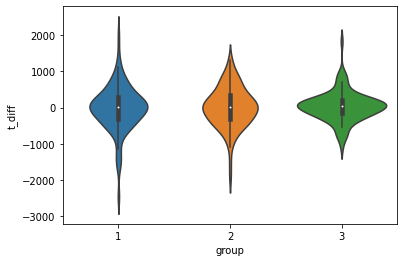

<IPython.core.display.Javascript object>

In [21]:
sns.violinplot(x="group", y="t_diff", data=new_df)

<AxesSubplot:xlabel='group', ylabel='t_diff'>

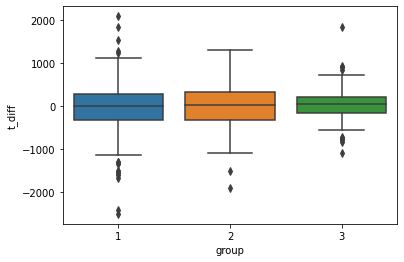

<IPython.core.display.Javascript object>

In [22]:
sns.boxplot(x="group", y="t_diff", data=new_df)

In [43]:
t, p = stats.bartlett(g1["t_diff"], g2["t_diff"], g3["t_diff"])
print(t)
print(p)
print(p < 0.05)

21.304616031410024
2.3646202761023815e-05
True


<IPython.core.display.Javascript object>

In [ ]:
# fail to reject due to high p value

# we run bartlett to see if we're able to run an anova test

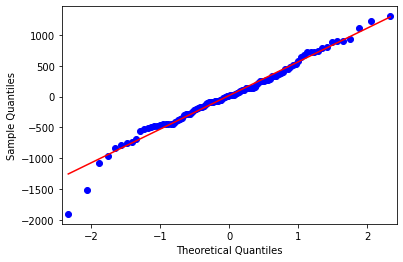

<IPython.core.display.Javascript object>

In [40]:
qqplot(g2["t_diff"], line="s")
plt.show()

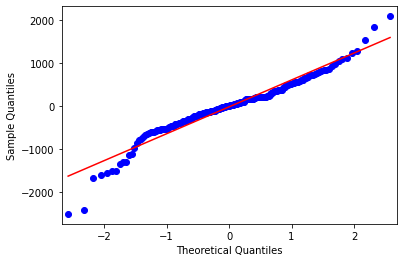

<IPython.core.display.Javascript object>

In [41]:
qqplot(g1["t_diff"], line="s")
plt.show()

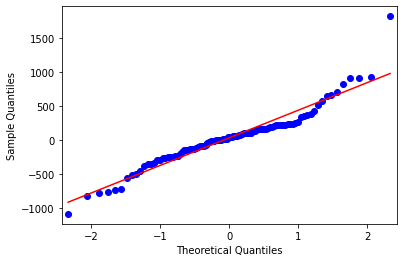

<IPython.core.display.Javascript object>

In [42]:
qqplot(g3["t_diff"], line="s")
plt.show()

In [44]:
f, p = stats.f_oneway(g1["t_diff"], g2["t_diff"], g3["t_diff"])

<IPython.core.display.Javascript object>

In [45]:
print(f)
print(p)
print(p < 0.05)

0.30218735532459357
0.7393694353924287
False


<IPython.core.display.Javascript object>

c:\users\matth\appdata\local\programs\python\python37\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


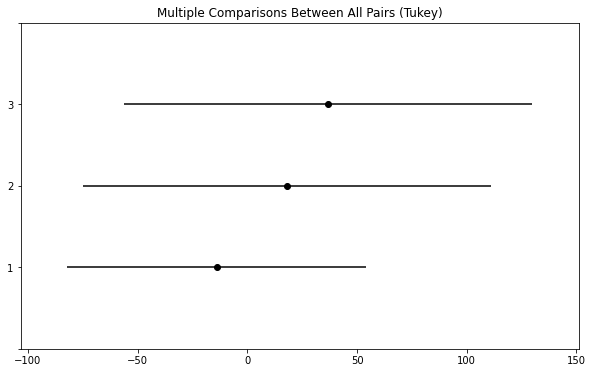

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,32.07,0.8763,-129.106,193.246,False
1,3,50.78,0.72,-110.396,211.956,False
2,3,18.71,0.9,-167.4,204.82,False


<IPython.core.display.Javascript object>

In [47]:
tukey_results = pairwise_tukeyhsd(new_df["t_diff"], new_df["group"])

# Plot results
tukey_results.plot_simultaneous()
plt.show()

# Show summary table of results
tukey_results.summary()

## Using dependent T test on each group

In [ ]:
stats.ttest_rel(df['bp_before'], df['bp_after'])

In [82]:
n1 = df[df["group"] == 1]
n2 = df[df["group"] == 2]
n3 = df[df["group"] == 3]

<IPython.core.display.Javascript object>

In [62]:
stats.ttest_rel(n1["t1"], n1["t2"])

Ttest_relResult(statistic=-0.31827677584963787, pvalue=0.7506087664956842)

<IPython.core.display.Javascript object>

In [55]:
stats.ttest_rel(n3["t1"], n3["t2"])

Ttest_relResult(statistic=0.8984773127301627, pvalue=0.37111115842334486)

<IPython.core.display.Javascript object>

In [56]:
stats.ttest_rel(n2["t1"], n2["t2"])

Ttest_relResult(statistic=0.32745622415118286, pvalue=0.7440142766032991)

<IPython.core.display.Javascript object>

## Using dependent T test on the whole

In [63]:
new_df.head()

,group,t_diff
0,1,-271
1,1,66
2,1,-593
3,1,-1661
4,1,418


<IPython.core.display.Javascript object>

In [64]:
signal = new_df["t_diff"].mean()
noise = new_df["t_diff"].std() / np.sqrt(new_df["t_diff"].size)

<IPython.core.display.Javascript object>

In [89]:
t = signal / noise
t

6.6425

<IPython.core.display.Javascript object>

In [66]:
stats.ttest_rel(df["t1"], df["t2"])

Ttest_relResult(statistic=0.23791543041617694, pvalue=0.812068813406293)

<IPython.core.display.Javascript object>

In [67]:
ci_lo = signal - 1.96 * noise
ci_hi = signal + 1.96 * noise
ci_lo, ci_hi
#95 percent confident that the mean lies between (-48.07988592186226, 61.36488592186225)

(-48.07988592186226, 61.36488592186225)

<IPython.core.display.Javascript object>

In [68]:
# with this data we fail to reject the null

6.6425

<IPython.core.display.Javascript object>

# 2. Is there a significant difference in the mean of all groups at time 2?

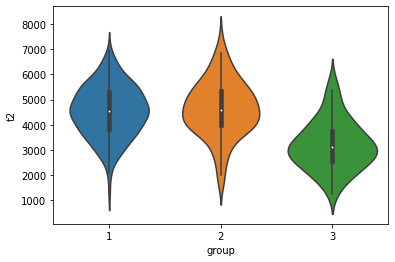

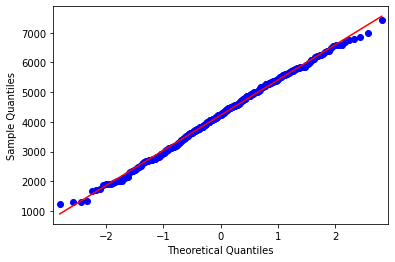

<IPython.core.display.Javascript object>

In [71]:
# check normality

sns.violinplot(x="group", y="t2", data=df)
plt.show()
qqplot(df["t2"], line="s")
plt.show()

In [88]:
f, p = stats.f_oneway(n1["t2"], n2["t2"], n3["t2"])
print(f)
print(p)

67.65846945026495
5.1893599904179e-26


<IPython.core.display.Javascript object>

In [ ]:
#this means that the mean is not te same for all groups since f is high and p is low (high percent that means are diff)
# (doesnt say what means are)
# p is high likely is the f value assuming no difference

c:\users\matth\appdata\local\programs\python\python37\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


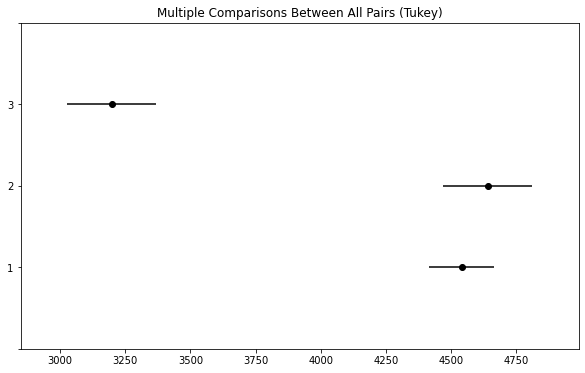

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,99.705,0.6902,-195.9612,395.3712,False
1,3,-1341.865,0.001,-1637.5312,-1046.1988,True
2,3,-1441.57,0.001,-1782.9759,-1100.1641,True


<IPython.core.display.Javascript object>

In [87]:
tukey_results = pairwise_tukeyhsd(df["t2"], df["group"])

# Plot results
tukey_results.plot_simultaneous()
plt.show()

# Show summary table of results
tukey_results.summary()